In [1]:
import tensorflow as tf
from tensorflow import keras

2024-01-07 13:08:46.575961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-07 13:08:46.648367: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-07 13:08:46.667970: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 13:08:48.411501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
# GPUメモリの動的割り当てを有効にする
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # GPUメモリの成長を許可する
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2024-01-07 13:08:49.993515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:08:50.016796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:08:50.016894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [ ]:
from da_libraries.manage_data_for_ml import CNNModelTrainer

tf.random.set_seed(40)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

%matplotlib inline
%load_ext tensorboard

ファイルのパスを指定

Load input_datasets and answer_datasets.

* It can't deal with data split per period.

In [4]:
help(CNNModelTrainer)

Help on class CNNModelTrainer in module kubota_libraries.manage_data_for_ml:

class CNNModelTrainer(BaseCNNModel)
 |  CNNModelTrainer(test_size, random_state)
 |  
 |  CNNモデルを訓練するクラス。
 |  Args:
 |      test_size: テストデータの割合（デフォルトは0.20）
 |      random_state: 乱数の種（デフォルトは40）
 |  
 |  Method resolution order:
 |      CNNModelTrainer
 |      BaseCNNModel
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, test_size, random_state)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  check_folders_existence(self, should_use_flatten_data_list, should_normalize_list, which_channels_list, chosen_parameter_folder_names_list)
 |      指定されたパラメータの組み合わせごとに、訓練データのフォルダが存在するかどうかをチェックする関数。
 |      
 |      Args:
 |          should_use_flatten_data_list (list): データをフラット化するかどうかを指定するブール値のリスト。
 |          should_normalize_list (list): データを正規化するかどうかを指定するブール値のリスト。
 |          which_channels_list (list): 使用するチャンネルを指定する文字列のリスト。
 |          chosen_parameter_fol

In [5]:
cnn_data_trainer = CNNModelTrainer(test_size=0.20, random_state=40)

In [6]:
cnn_data_trainer.update_settings()

Should Flatten:  False
Split parameter:  data_split_by_1_period
Which Channel:  SG2
Should Normalize: True


In [14]:
cnn_data_trainer.load_train_test_data()

2
Should Flatten:  False
Split parameter:  data_split_by_1_period
Which Channel:  SG2
Should Normalize: True
Num of train data：4608 (0deg：576 / 15deg：576 / 30deg：576 / 45deg：576 / 60deg：576 / 75deg：576 / 90deg：576 / No Wind：576)
Num of test data：1152 (0deg：144 / 15deg：144 / 30deg：144 / 45deg：144 / 60deg：144 / 75deg：144 / 90deg：144 / No Wind：144)


In [15]:
cnn_data_trainer.input_train.shape

(4608, 833, 1)

In [16]:
cnn_data_trainer.get_model(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 833, 1)]          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 578, 16)           4112      
                                                                 
 re_lu_5 (ReLU)              (None, 578, 16)           0         
                                                                 
 batch_normalization_5 (Batc  (None, 578, 16)          64        
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 578, 16)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 451, 16)           32784     
                                                           

In [17]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# log_dir = "logs/fit/"
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
# cnn_data_trainer.train_model(epochs=2000, verbose=1, validation_split=0.2, batch_size=128)
cnn_data_trainer.train_model(epochs=20, verbose=1, validation_split=0.2, batch_size=128)

2024-01-07 13:10:16.493359: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-01-07 13:10:16.493416: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2024-01-07 13:10:16.660768: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2024-01-07 13:10:16.660944: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Training start time: 2024-01-07 13:10:16
Epoch 1/20
 1/29 [>.............................] - ETA: 17s - loss: 3.4036 - accuracy: 0.1094

2024-01-07 13:10:17.343455: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-01-07 13:10:17.343469: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


16/29 [===============>..............] - ETA: 0s - loss: 3.3546 - accuracy: 0.1270

2024-01-07 13:10:17.617587: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2024-01-07 13:10:17.618032: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed
2024-01-07 13:10:17.633830: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:521]  GpuTracer has collected 412 callback api events and 413 activity events. 
2024-01-07 13:10:17.638257: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2024-01-07 13:10:17.642887: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ../logs/240104_w_shaft/1704600616.493165/train/plugins/profile/2024_01_07_13_10_17

2024-01-07 13:10:17.646746: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ../logs/240104_w_shaft/1704600616.493165/train/plugins/profile/2024_01_07_13_10_17/winddetection.trace.json.gz
2024-01-07 13:10:17.660641: I tensorflow/core/pro

29/29 [==============================] - 1s 25ms/step - loss: 3.3459 - accuracy: 0.1332 - val_loss: 2.6772 - val_accuracy: 0.1377
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 3.2010 - accuracy: 0.1394 - val_loss: 2.8862 - val_accuracy: 0.1692
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 3.0081 - accuracy: 0.1305 - val_loss: 3.8792 - val_accuracy: 0.1681
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 2.8841 - accuracy: 0.1427 - val_loss: 3.6160 - val_accuracy: 0.1659
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 2.7467 - accuracy: 0.1405 - val_loss: 2.8558 - val_accuracy: 0.1529
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 2.6921 - accuracy: 0.1443 - val_loss: 2.8039 - val_accuracy: 0.1638
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 2.5978 - accuracy: 0.1555 - val_loss: 2.5085 - val_accuracy: 0.1616
Epoch 8/20
29/29 [============

In [19]:
cnn_data_trainer.optimal_epochs()

,Metric,Optimal Epoch,Value at Optimal Epoch
0,loss,19,1.626751
1,val_loss,20,1.659543
2,accuracy,19,0.355670
3,val_accuracy,20,0.370933


In [20]:
cnn_data_trainer.history.head(100)

,loss,accuracy,val_loss,val_accuracy
0,3.345926,0.133207,2.677197,0.137744
1,3.200990,0.139447,2.886223,0.169197
2,3.008102,0.130494,3.879202,0.168113
3,2.884139,0.142702,3.615955,0.165944
4,2.746686,0.140532,2.855820,0.152928
5,2.692105,0.144330,2.803855,0.163774
6,2.597831,0.155453,2.508545,0.161605
7,2.603278,0.140260,2.468048,0.163774
8,2.517430,0.150027,2.298250,0.170282
9,2.421140,0.175529,2.326200,0.171367


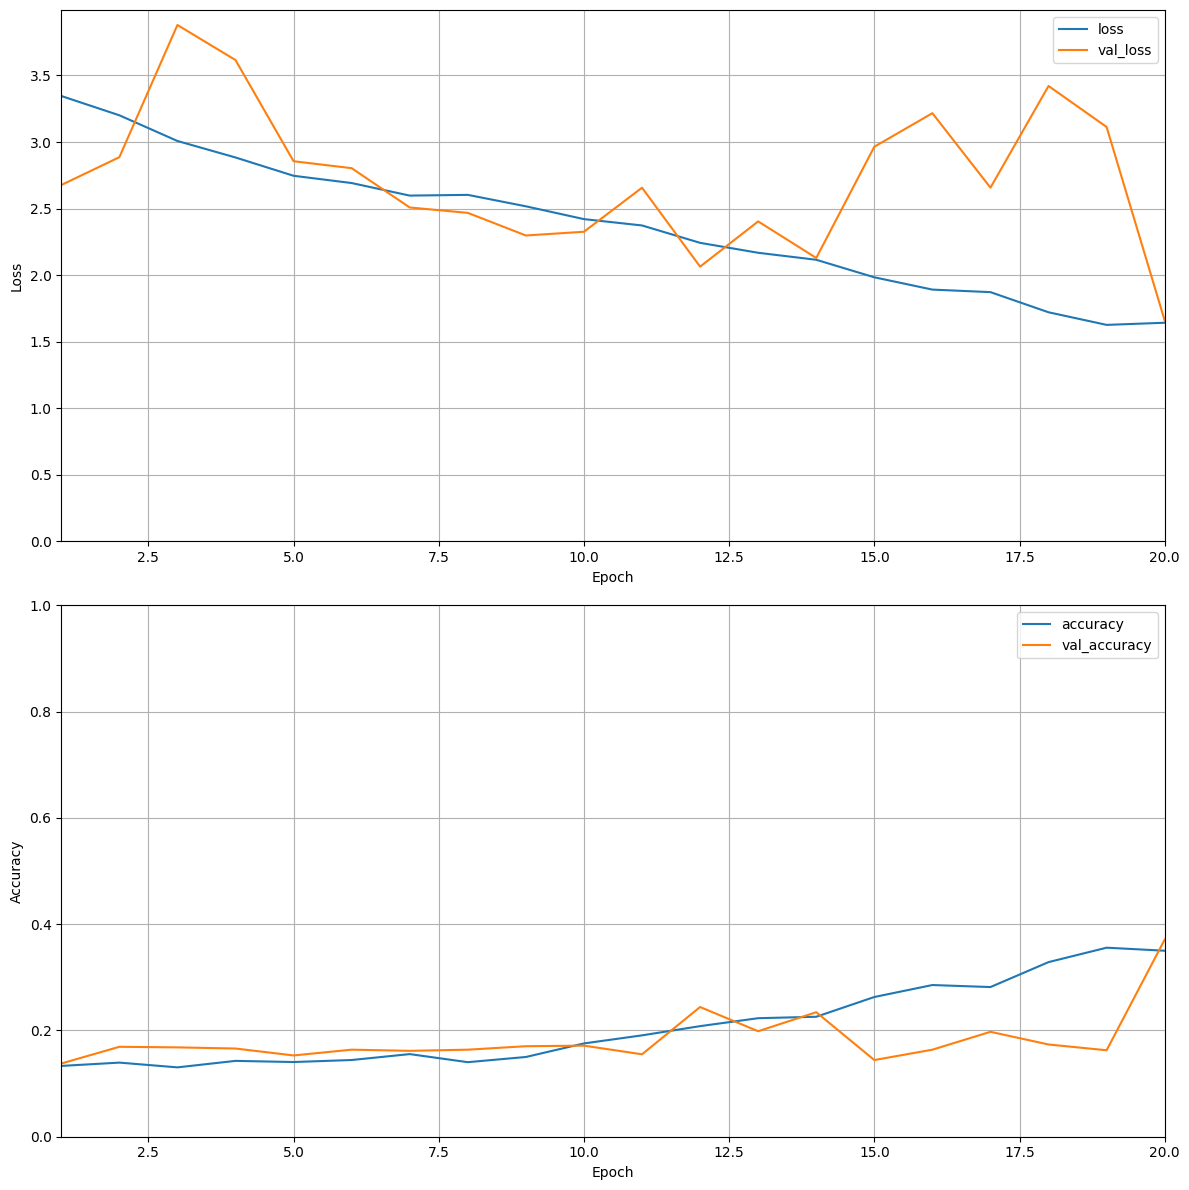

In [21]:
history_fig = cnn_data_trainer.plot_history()

In [22]:
df = cnn_data_trainer.evaluate_model()
df

36/36 [==============================] - 0s 1ms/step - loss: 1.6556 - accuracy: 0.3559


36/36 [==============================] - 0s 845us/step

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation kernel type, such as MatMul, Conv2D. Graph nodes belonging to the same type are aggregated together.
flops: Number of float 

2024-01-07 13:10:32.172330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:10:32.172445: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-01-07 13:10:32.172491: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2024-01-07 13:10:32.172657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:10:32.172723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:10:32.172773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] su

,Metric,Value
0,Test Accuracy,35.59027910232544 %
1,Estimation Time,58.85720252990723 ms
2,Memory used by the model,81.92 kB
3,Model FLOPS,55.81216 MFLOP/s


In [ ]:
df = cnn_data_trainer.evaluate_model()
df

 1/36 [..............................] - ETA: 0s

36/36 [==============================] - 0s 859us/step
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation kernel type, such as MatMul, Conv2D

2024-01-07 13:09:48.559958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:09:48.560049: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-01-07 13:09:48.560095: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2024-01-07 13:09:48.560321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:09:48.560399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-07 13:09:48.560452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] su

,Metric,Value
0,Test Accuracy,37.23958432674408 %
1,Estimation Time,58.45465660095215 ms
2,Memory used by the model,16.384 kB
3,Model FLOPS,55.81216 MFLOP/s


In [ ]:
df = cnn_data_trainer.evaluate_model()
df

In [ ]:
accuracy_num_fig = cnn_data_trainer.visualize_confusion_matrix(output_type="num")

In [ ]:
accuracy_percentage_fig = cnn_data_trainer.visualize_confusion_matrix(output_type="percentage")

In [ ]:
cnn_data_trainer.save_model()

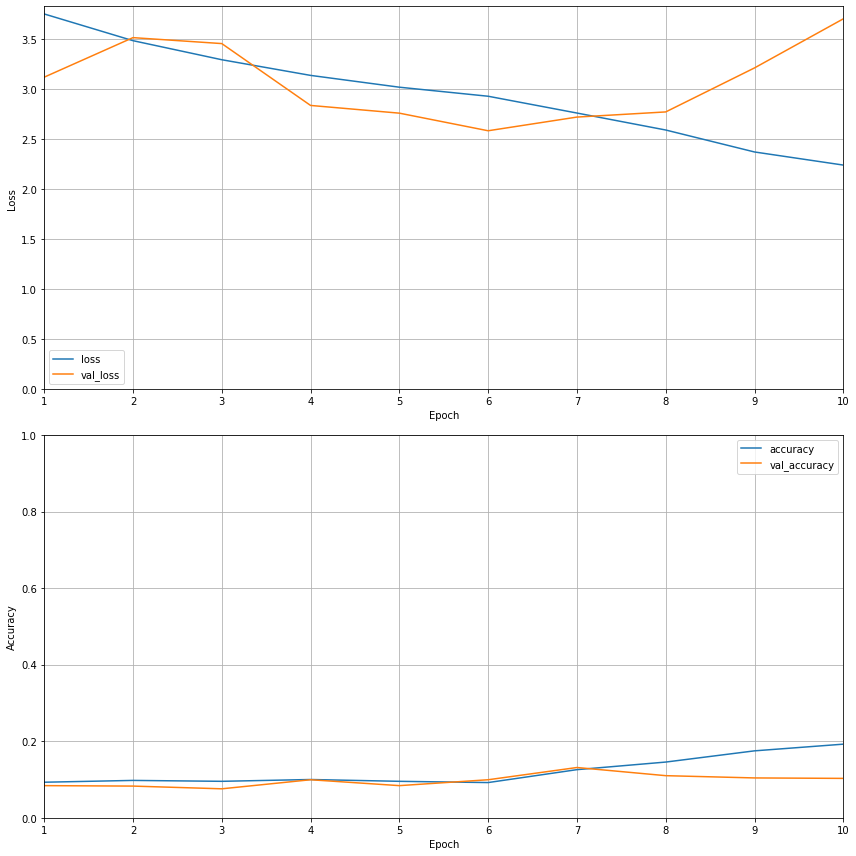

In [14]:
history_fig = cnn_data_trainer.plot_history()

In [15]:
df = cnn_data_trainer.evaluate_model()
df

33/33 [==============================] - 0s 4ms/step - loss: 3.7601 - accuracy: 0.0966
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


,Metric,Value
0,Test Accuracy,9.659090638160706 %
1,Estimation Time,197.49250411987305 ms
2,Memory used by the model,12.316672 MB
3,Model FLOPS,20.453442 MFLOP/s


In [17]:
df = cnn_data_trainer.evaluate_model()
df

33/33 [==============================] - 0s 6ms/step - loss: 2.4069 - accuracy: 0.0900
2993730


,Metric,Value
0,Test Accuracy,8.996212482452393 %
1,Estimation Time,0.1265784740447998 s
2,Memory used by the model,12300288 bytes
3,Model FLOPS,2993730


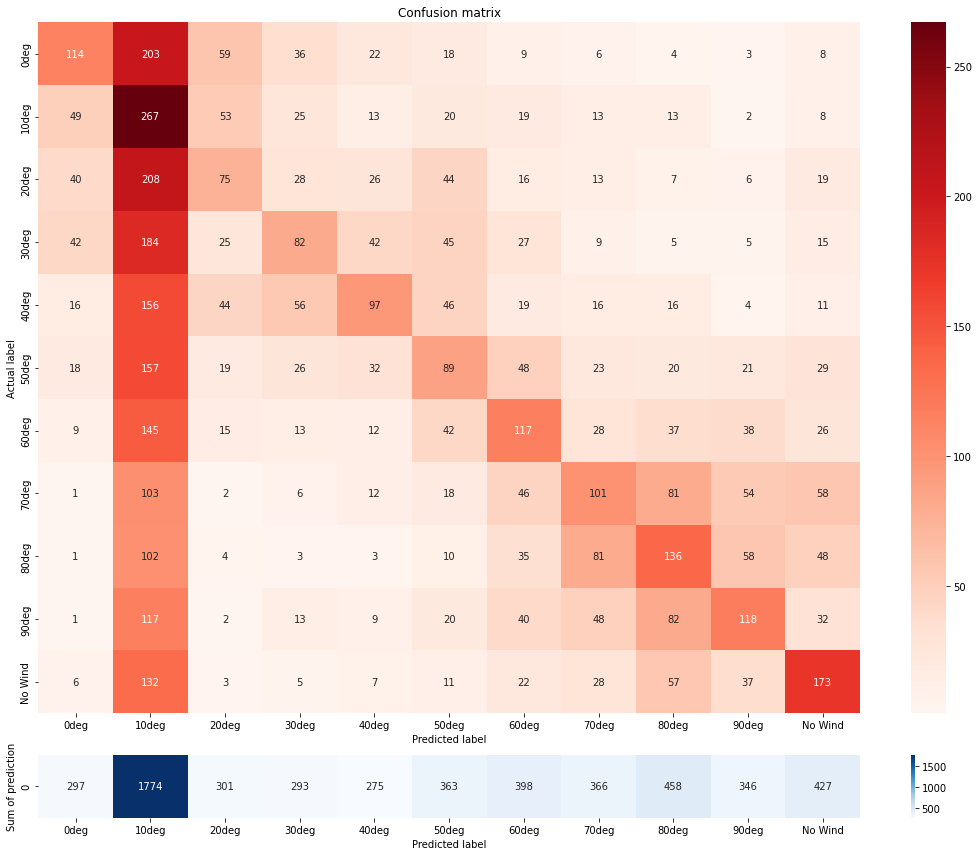

In [25]:
accuracy_num_fig = cnn_data_trainer.visualize_confusion_matrix(output_type="num")

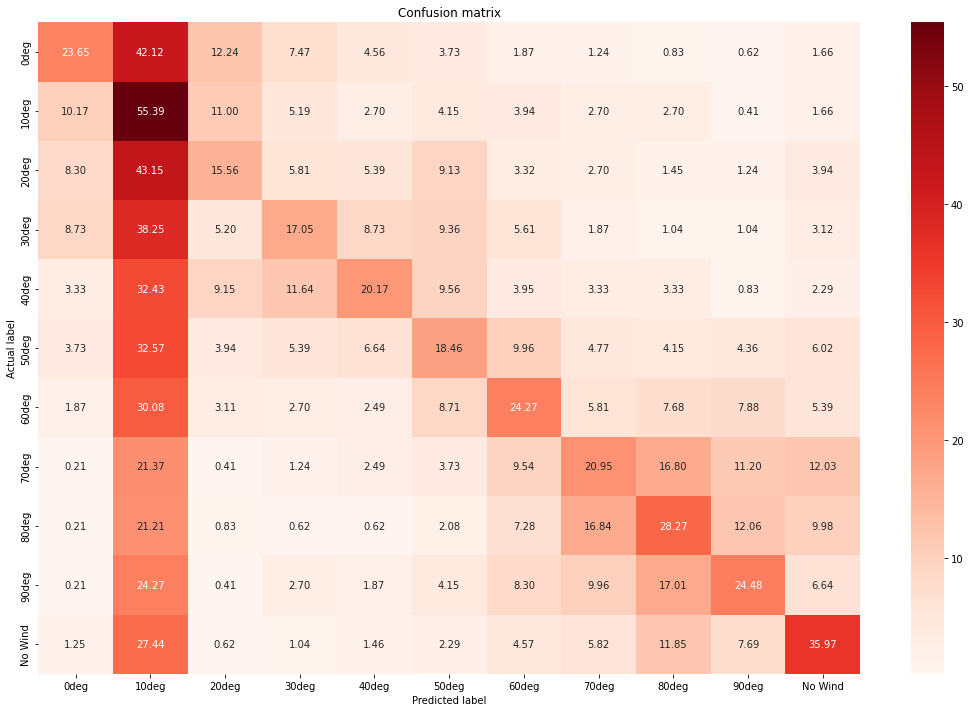

In [26]:
accuracy_percentage_fig = cnn_data_trainer.visualize_confusion_matrix(output_type="percentage")

In [17]:
cnn_data_trainer.save_model()

../models/230717_o1h&o2/1_CNN/raw_data/data_split_by_1_period/normalized/my_model
INFO:tensorflow:Assets written to: ../models/230717_o1h&o2/1_CNN/raw_data/data_split_by_1_period/normalized/my_model\assets


In [ ]:
cnn_data_trainer.model_path

In [ ]:
!tensorboard --logdir='./logs'

In [ ]:
keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

# 下のコード実行すれば、一気にすべてのチャネルのひずみデータによるモデルの学習最適化が可能。

※ csv_nameは毎回変えること

In [ ]:
# voltage = 2.5
# class_num = 7
#
# cnn_data_handler = CNNDataHandler(voltage, class_num)
#
# ans = {}
#
# # split_nums は自分で指定。
# # split_nums = [5, 10, 20, 25, 30, 35, 40, 45, 50, 70, 100, 150]
# split_nums = [5, 10, 20, 30, 40, 50]
# # split_nums = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#
# # channels = ["1", "2", "3", ""]
# # channels = ["12", "23", "31"]
# channels = [""]
#
# csv_name = "ans_m_20_c_1050.csv"
#
# for split_num in split_nums:
#     tmp_ans = []
#     for which_channel in channels:
#
#         epochs = round(np.sqrt(split_num)) * 200
#         # epochs = 3
#
#         print(epochs)
#
#         # cnn_data_manager.set_variables(True, split_num=split_num, which_channel=which_channel)
#         cnn_data_handler.set_variables(True, split_num=split_num, which_channel=which_channel, m=1050, cut_off=20)
#
#         input_train, input_test, answer_train, answer_test = cnn_data_handler.get_train_test_data()
#
#         selected_model = select_model_based_on_data(input_train, class_num)
#
#         selected_model.compile(optimizer='adam',
#                          loss='sparse_categorical_crossentropy',
#                          metrics=['accuracy'])
#
#         my_history = selected_model.fit(input_train, answer_train, epochs=epochs, verbose=0, validation_split=0.2, batch_size=100, callbacks=[tensorboard])
#
#         val_losses = my_history.history["val_loss"]
#         val_accuracies = my_history.history["val_accuracy"]
#
#         next_epoch = val_accuracies.index(max(val_accuracies)) + 1
#
#         print(val_losses.index(min(val_losses)))
#         print(f"最適な学習回数：{next_epoch}")
#
#         del my_model, my_history
#
#         my_model = selected_model()
#
#         my_model.compile(optimizer='adam',
#                          loss='sparse_categorical_crossentropy',
#                          metrics=['accuracy'])
#
#         my_history = my_model.fit(input_train, answer_train, epochs=next_epoch, verbose=0, validation_split=0.2, batch_size=100, callbacks=[tensorboard])
#
#
#         data_names = ["loss", "accuracy", "val_loss", "val_accuracy"]
#         data1 = [my_history.history[data_name][next_epoch-1] for data_name in data_names]
#         data2 = my_model.evaluate(input_test, answer_test)
#         tmp_ans += data1+[next_epoch]+data2
#
#         cnn_data_manager.save_model(my_model)
#
#         del my_model, my_history, input_train, input_test, answer_train, answer_test
#     ans[split_num] = tmp_ans
#
#
# # 全ひずみゲージを含まない場合
# # df_ans = pd.DataFrame(ans, index=["loss_1", "accuracy_1", "val_loss_1", "val_accuracy_1", "epoch_1", "test_loss_1", "test_accuracy_1", "loss_2", "accuracy_2", "val_loss_2", "val_accuracy_2", "epoch_2", "test_loss_2", "test_accuracy_2","loss_3", "accuracy_3", "val_loss_3", "val_accuracy_3", "epoch_3",  "test_loss_3", "test_accuracy_3"])
#
# # 全ひずみゲージを含む場合
# # df_ans = pd.DataFrame(ans, index=["loss_1", "accuracy_1", "val_loss_1", "val_accuracy_1", "epoch_1", "test_loss_1", "test_accuracy_1", "loss_2", "accuracy_2", "val_loss_2", "val_accuracy_2", "epoch_2", "test_loss_2", "test_accuracy_2","loss_3", "accuracy_3", "val_loss_3", "val_accuracy_3", "epoch_3",  "test_loss_3", "test_accuracy_3", "loss", "accuracy", "val_loss", "val_accuracy", "epoch", "test_loss", "test_accuracy"])
#
# # 全ひずみゲージだけの場合
# df_ans = pd.DataFrame(ans, index=["loss", "accuracy", "val_loss", "val_accuracy", "epoch", "test_loss", "test_accuracy"])
#
# df_ans.to_csv(csv_name)

In [ ]:
# # 全ひずみゲージを含む場合
# df_ans = pd.DataFrame(ans, index=["loss", "accuracy", "val_loss", "val_accuracy", "epoch", "test_loss", "test_accuracy"])
#
#
# df_ans.to_csv(csv_name)

In [ ]:
# df_ans = pd.DataFrame(ans, index=["loss_1", "accuracy_1", "val_loss_1", "val_accuracy_1", "test_loss_1", "test_accuracy_1","loss_2", "accuracy_2", "val_loss_2", "val_accuracy_2", "test_loss_2", "test_accuracy_2","loss_3", "accuracy_3", "val_loss_3", "val_accuracy_3", "test_loss_3", "test_accuracy_3"])
#
# df_ans

In [ ]:

# try:
#     os.makedirs(f"models/{voltage}V/{split_num}")
# except FileExistsError:
#     pass

# my_model.save(f"models/{voltage}V/{split_num}/my_model")
# my_model.save_weights(f"models/{voltage}V/{split_num}/my_model.h5")

In [ ]:
# split_num = input("分割回数は？")
# input_train, input_test, answer_train, answer_test = get_train_test_data(voltage, class_num)
# print(split_num)
# reconstruct_model = keras.models.load_model(f"models/2.5V/{split_num}/my_model")
# reconstruct_model.load_weights(f"models/2.5V/{split_num}/my_model.h5")
# reconstruct_model.evaluate(input_test, answer_test)

In [ ]:
# reconstruct_model = cnn_data_manager.get_saved_model()

In [ ]:
# reconstruct_model.evaluate(input_test, answer_test)

GPUの確認

In [ ]:
tf.config.list_physical_devices(device_type='GPU')

In [ ]:
tf.test.is_built_with_cuda()

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()[1])

In [ ]:
tf.__version__